In [55]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

Rotten Tomatoes Dataset

In [56]:
df = pd.read_csv('critics.csv')

In [57]:
df.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
0,Owen Gleiberman,fresh,114709,Entertainment Weekly,NaN,2011-09-07,9559,Toy story
1,Derek Adams,fresh,114709,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559,Toy story
2,Richard Corliss,fresh,114709,TIME Magazine,The year's most inventive comedy.,2008-08-31,9559,Toy story
3,David Ansen,fresh,114709,Newsweek,A winning animated feature that has something ...,2008-08-18,9559,Toy story
4,Leonard Klady,fresh,114709,Variety,The film sports a provocative and appealing st...,2008-06-09,9559,Toy story


In [58]:
df.shape

(27631, 8)

In [59]:
df.isnull().any()

critic          True
fresh          False
imdb           False
publication    False
quote           True
review_date    False
rtid           False
title          False
dtype: bool

In [60]:
df.isnull().sum()

critic          3891
fresh              0
imdb               0
publication        0
quote          12070
review_date        0
rtid               0
title              0
dtype: int64

In [61]:
df.dropna(axis=0, inplace=True)

In [62]:
df.shape

(14792, 8)

In [63]:
n_reviews = len(df)
n_movies = df.rtid.nunique()
n_critics = df.critic.nunique()

print("Number of reviews: {}".format(n_reviews))
print("Number of critics: {}".format(n_critics))
print("Number of movies:  {}".format(n_movies))

Number of reviews: 14792
Number of critics: 622
Number of movies:  1893


Text(0.5,1,'Average Rating Per Critic')

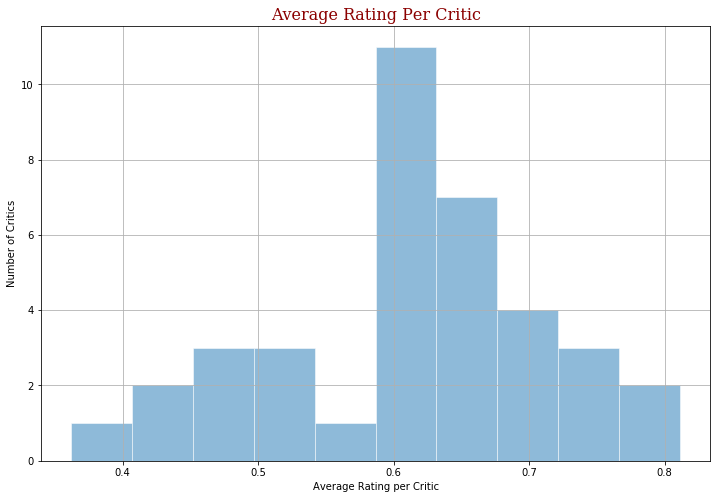

In [64]:
df = critics.copy()
df['fresh'] = df.fresh == 'fresh'
grp = df.groupby('critic')
counts = grp.critic.count()
means = grp.fresh.mean()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


plt.figure(figsize = (12,8))
means[counts > 100].hist(bins = 10, edgecolor = 'w', lw = 1, alpha = 0.5)
plt.xlabel('Average Rating per Critic')
plt.ylabel('Number of Critics')
plt.title('Average Rating Per Critic', fontdict=font)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(df['quote'])
y = df['fresh']

using naive_bayes to test data

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [86]:
model = MultinomialNB()
model.fit(X_train, y_train)
pre = model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print (classification_report(y_test, pre))
print (confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

       False       0.92      0.24      0.38      1746
        True       0.67      0.99      0.80      2692

    accuracy                           0.69      4438
   macro avg       0.79      0.61      0.59      4438
weighted avg       0.77      0.69      0.63      4438

[[ 412 1334]
 [  35 2657]]


using Logistic Regression to test data

In [90]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression()
md = lr.fit(X_train, y_train)
pred = md.predict(X_test)

/Users/jamiezeng/anaconda2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
print (classification_report(y_test, pred))
print (confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

       False       0.77      0.53      0.63      1746
        True       0.75      0.90      0.82      2692

    accuracy                           0.75      4438
   macro avg       0.76      0.71      0.72      4438
weighted avg       0.76      0.75      0.74      4438

[[ 921  825]
 [ 268 2424]]
